# Análisis de la Correlación entre el NASDAQ y el VXN

Este Jupyter Notebook tiene como objetivo explorar la **correlación entre el índice NASDAQ y el índice VXN**. Para ello, analizaremos un conjunto de datos que incluye información diaria del NASADAQ desde el 1 de enero de 2005 hasta el 22 de julio de 2025.

### Vamos a reutilizar el codigo que ya hicimos en el primer jupyter notebook donde buscabamos la relacion entre el VIX y el S&P500
---

## Datos a Utilizar

El dataset del Nasdaq contiene las siguientes columnas:

* **date**: Fecha de la observación.
* **open**: Precio de apertura.
* **high**: Precio máximo.
* **low**: Precio mínimo.
* **close**: Precio de cierre.
* **volume**: Volumen de negociación.
* **sp_pct_move**: Porcentaje de cambio diario del Nasdaq.

Además de los datos del NASDAQ, incorporaremos los mismos datos para el **índice VXN**, conocido como el "índice del miedo tecnologico", ya que mide la volatilidad esperada del NASDAQ.

---

## Objetivos del Análisis

El estudio se centrará en los siguientes puntos clave:

* **Encontrar correlaciones** entre el NASDAQ y el VXN.
* Identificar **patrones en extensiones de movimiento** de ambos índices.
* Calcular la **media de movimiento** del NASDAQ en torno a diferentes rangos de precios del VXN.
* Realizar **cálculos de desviación estándar** para entender la dispersión de los movimientos cuando se encuentran correlaciones.

---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar el data set que se descargo previamente de yfinance con el ticker NQ=F

In [71]:
ES_df = pd.read_csv("C:/Users/juana/OneDrive/Escritorio/Datos_del_mercado/Data_sets/NQ_data_daily_2025.csv")
ES_df

,date,open,high,low,close,volume,sp_pct_move
0,2005-01-03,1628.00,1644.00,1605.00,1615.50,365482,2.395577
1,2005-01-04,1614.00,1620.00,1571.50,1582.50,452423,3.004957
2,2005-01-05,1582.50,1588.00,1564.50,1565.50,381192,1.484992
3,2005-01-06,1566.50,1577.50,1561.50,1563.00,304750,1.021385
4,2005-01-07,1562.50,1584.50,1557.50,1567.50,384047,1.728000
...,...,...,...,...,...,...,...
5173,2025-07-16,23018.75,23100.00,22835.50,23076.50,548602,1.149063
5174,2025-07-17,23065.50,23279.75,23017.00,23251.00,445290,1.139147
5175,2025-07-18,23261.25,23320.75,23169.50,23224.25,450704,0.650223
5176,2025-07-21,23232.50,23424.75,23203.75,23342.00,398833,0.951254


## Cargar el data set que se descargo previamente de yfinance con el ticker ^VXN

In [73]:
VIX_df = pd.read_csv("C:/Users/juana/OneDrive/Escritorio/Datos_del_mercado/Data_sets/vxn_data_daily_2025.csv")
VIX_df

,date,open,high,low,close,volume,vix_avg_hl
0,2005-01-03,19.059999,19.760000,18.820000,19.500000,1200,19.290000
1,2005-01-04,19.629999,20.770000,19.580000,20.059999,1000,20.175000
2,2005-01-05,20.190001,20.190001,19.520000,20.180000,1000,19.855000
3,2005-01-06,20.250000,20.260000,19.760000,20.129999,1000,20.010000
4,2005-01-07,20.010000,20.010000,18.830000,19.150000,1000,19.420000
...,...,...,...,...,...,...,...
5165,2025-07-16,19.500000,21.540001,19.190001,19.540001,0,20.365001
5166,2025-07-17,19.600000,19.700001,18.389999,18.670000,0,19.045000
5167,2025-07-18,18.670000,19.150000,18.340000,18.610001,0,18.745000
5168,2025-07-21,19.010000,19.010000,18.410000,18.709999,0,18.710000


---
## Corrección y Normalización de Datos

Como podemos observar al analizar nuestros DataFrames, notamos que el DataFrame del **Nasdaq** tiene más filas que el DataFrame del **VXN** Al igual que lo vimos en el anterior notebook y las causas de esto pueden ser las mismas que analizamos anterior mente:

* Un **error en la extracción de datos** desde `yfinance` para el VXN.
* La presencia de **valores nulos** en el DataFrame del VXN, que no se registraron adecuadamente.
* Posibles **días feriados** o no operativos en los que el VXN no registró datos específicos.
---

In [76]:
# Fechas únicas en cada df
sp500_dates = set(ES_df['date'])
vix_dates = set(VIX_df['date'])

# Días en sp500_df pero no en vix_df
solo_sp500 = sp500_dates - vix_dates

# Días en vix_df pero no en sp500_df
solo_vix = vix_dates - sp500_dates

#Creamos una lista de las fechas para buscarlas en los df y eliminar esas filas
fechas = list(solo_sp500)
fechas.extend(solo_vix)

In [78]:
#Ahora eliminamos las filas que contengan estas fechas en la columna 'date'

# El simbolo ~ es una negacion en el df para que los valores que no encuentre en la lista 
# de fechas que queremos eliminar las deje como TRUE y las que si encontro las deje como FALSE 
#Para eliminar las fechas que queremos
ES_df = ES_df[~ ES_df['date'].isin(fechas)]
VIX_df = VIX_df[~ VIX_df['date'].isin(fechas)]

#Reseteamos el indice del df ES y VIX
ES_df.reset_index(drop=True,inplace=True)
VIX_df.reset_index(drop=True,inplace=True)

'''Despues de hacer que nuestros dos df esten alineados y con las fechas correctas ahora hacemos un unico df con los 
#datos que nos interesan en este momento'''

#Creamos un df con los datos que necesitamos para nuestro estudio
df = pd.DataFrame(columns=['es_date','sp_pct_move','vix_date','vix_avg_hl'])
df['es_date']=ES_df['date']
df['sp_pct_move'] = ES_df['sp_pct_move']
df['vix_date']= VIX_df['date']
df['vix_avg_hl']=VIX_df['vix_avg_hl']
df

,es_date,sp_pct_move,vix_date,vix_avg_hl
0,2005-01-03,2.395577,2005-01-03,19.290000
1,2005-01-04,3.004957,2005-01-04,20.175000
2,2005-01-05,1.484992,2005-01-05,19.855000
3,2005-01-06,1.021385,2005-01-06,20.010000
4,2005-01-07,1.728000,2005-01-07,19.420000
...,...,...,...,...
5163,2025-07-16,1.149063,2025-07-16,20.365001
5164,2025-07-17,1.139147,2025-07-17,19.045000
5165,2025-07-18,0.650223,2025-07-18,18.745000
5166,2025-07-21,0.951254,2025-07-21,18.710000


## Agrupamiento de rangos

- Se hace uso de la funcion pd.cut para hacer una nueva columna de datos en nuestro df y deterninar los rangos de vix que se tubo en ciertas fechas para hacer un estudio mas organizado 

In [81]:
#Hacemos la lista de bins para adjuntar en la funcion de pd.cut y agrupar el df por rangos 
list_vix_range = [0,10,12,14,16,18,20,22,24,26,28,30,100]
labels = ['0-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24','24-26','26-28','28-30','30+']
df['vix_range'] = pd.cut(df['vix_avg_hl'],bins=list_vix_range,labels=labels)
df

,es_date,sp_pct_move,vix_date,vix_avg_hl,vix_range
0,2005-01-03,2.395577,2005-01-03,19.290000,18-20
1,2005-01-04,3.004957,2005-01-04,20.175000,20-22
2,2005-01-05,1.484992,2005-01-05,19.855000,18-20
3,2005-01-06,1.021385,2005-01-06,20.010000,20-22
4,2005-01-07,1.728000,2005-01-07,19.420000,18-20
...,...,...,...,...,...
5163,2025-07-16,1.149063,2025-07-16,20.365001,20-22
5164,2025-07-17,1.139147,2025-07-17,19.045000,18-20
5165,2025-07-18,0.650223,2025-07-18,18.745000,18-20
5166,2025-07-21,0.951254,2025-07-21,18.710000,18-20


## Agregación por rangos de VIX con `groupby` + `agg`

En este bloque de código agrupamos nuestro DataFrame `df` por los rangos de volatilidad ya creados en la columna `vix_range`, y calculamos tres estadísticos sobre el movimiento porcentual del S&P 500 (`sp_pct_move`):

```python
summary_stats = (
    df
    .groupby('vix_range', observed=True)['sp_pct_move']
    .agg(['mean', 'median', 'std'])
    .reset_index()
)


In [84]:
# Agrupar por los rangos de VIX ('sort') y calcular media y mediana del movimiento porcentual
summary_stats = df.groupby('vix_range',observed=True)['sp_pct_move'].agg(['mean', 'median','std']).reset_index()
summary_stats

,vix_range,mean,median,std
0,10-12,0.781218,0.598635,0.496172
1,12-14,0.843685,0.764348,0.342588
2,14-16,1.088601,0.983233,0.463179
3,16-18,1.305633,1.197963,0.522723
4,18-20,1.488938,1.375340,0.608058
5,20-22,1.669515,1.590768,0.697295
6,22-24,1.834460,1.697405,0.712743
7,24-26,2.153809,1.996216,0.802014
8,26-28,2.241623,2.153902,0.919412
9,28-30,2.485450,2.271397,1.040433


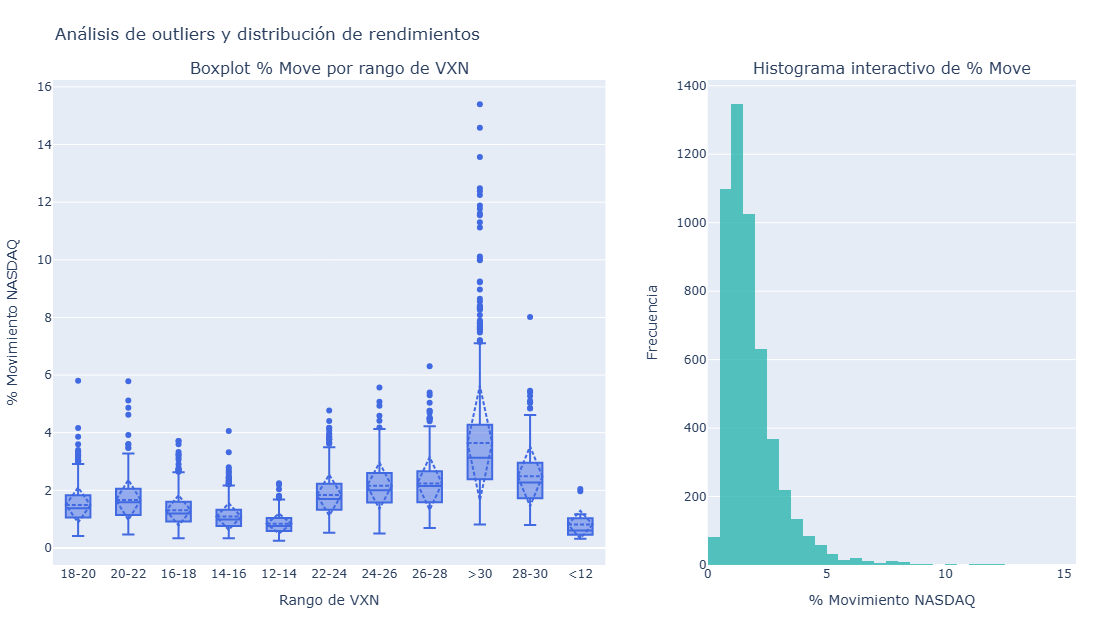

In [86]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ——— 1. Creamos los rangos de VIX ———
bins = [0,12,14,16,18,20,22,24,26,28,30, df['vix_avg_hl'].max()+1]
labels = ['<12','12-14','14-16','16-18','18-20','20-22','22-24','24-26','26-28','28-30','>30']
df['vix_range'] = pd.cut(df['vix_avg_hl'], bins=bins, labels=labels, right=False)

# ——— 2. Montamos el dashboard con Plotly ———
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    subplot_titles=('Boxplot % Move por rango de VXN', 'Histograma interactivo de % Move')
)

# 2.1 Boxplot por rango de VIX
fig.add_trace(
    go.Box(
        x=df['vix_range'],
        y=df['sp_pct_move'],
        marker_color='royalblue',
        boxmean='sd',                # dibuja media y sd
        hovertemplate=
            'VIX range: %{x}<br>' +
            '% Move: %{y:.2f}%<br>' +
            '<extra></extra>',
    ),
    row=1, col=1
)

# 2.2 Histograma interactivo
fig.add_trace(
    go.Histogram(
        x=df['sp_pct_move'],
        nbinsx=50,
        marker_color='lightseagreen',
        opacity=0.75,
        hovertemplate=
            '% Movement: %{x:.2f}%<br>' +
            'Count: %{y}<br>' +
            '<extra></extra>',
    ),
    row=1, col=2
)

# ——— 3. Ajustes de estilo y diseño ———
fig.update_layout(
    title_text='Análisis de outliers y distribución de rendimientos',
    height=600, width=1100,
    showlegend=False,
    margin=dict(t=80, l=50, r=20, b=50)
)

# Etiquetas
fig.update_xaxes(title_text='Rango de VXN', row=1, col=1)
fig.update_yaxes(title_text='% Movimiento NASDAQ', row=1, col=1)
fig.update_xaxes(title_text='% Movimiento NASDAQ', row=1, col=2)
fig.update_yaxes(title_text='Frecuencia', row=1, col=2)

fig.show()

In [88]:
from scipy.stats.mstats import winsorize

def winsorize_group(x):
    return winsorize(x, limits=(0.01, 0.01))

# Aplicar por rango de VIX
df['sp_pct_move_winsor'] = df.groupby('vix_range',observed=True)['sp_pct_move'].transform(winsorize_group)
df

,es_date,sp_pct_move,vix_date,vix_avg_hl,vix_range,sp_pct_move_winsor
0,2005-01-03,2.395577,2005-01-03,19.290000,18-20,2.395577
1,2005-01-04,3.004957,2005-01-04,20.175000,20-22,3.004957
2,2005-01-05,1.484992,2005-01-05,19.855000,18-20,1.484992
3,2005-01-06,1.021385,2005-01-06,20.010000,20-22,1.021385
4,2005-01-07,1.728000,2005-01-07,19.420000,18-20,1.728000
...,...,...,...,...,...,...
5163,2025-07-16,1.149063,2025-07-16,20.365001,20-22,1.149063
5164,2025-07-17,1.139147,2025-07-17,19.045000,18-20,1.139147
5165,2025-07-18,0.650223,2025-07-18,18.745000,18-20,0.650223
5166,2025-07-21,0.951254,2025-07-21,18.710000,18-20,0.951254


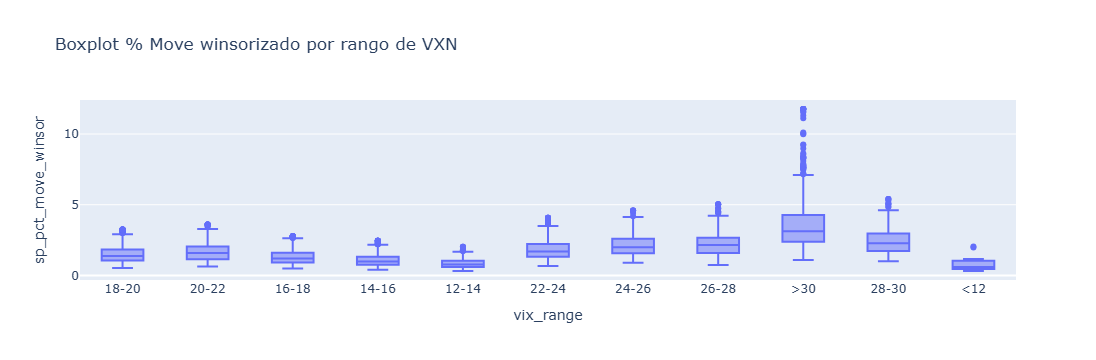

In [90]:
import plotly.express as px

fig = px.box(df, 
             x='vix_range', 
             y='sp_pct_move_winsor', 
             points='outliers', 
             title='Boxplot % Move winsorizado por rango de VXN')
fig.show()


In [92]:
# Estadísticas descriptivas con la columna normalizada
summary_stats_winsor = df.groupby('vix_range', observed=True)['sp_pct_move_winsor'] \
                         .agg(['mean', 'median', 'std']).reset_index()

summary_stats_winsor

,vix_range,mean,median,std
0,<12,0.809201,0.605472,0.493289
1,12-14,0.841768,0.765582,0.339154
2,14-16,1.083672,0.982761,0.443046
3,16-18,1.299115,1.196216,0.502913
4,18-20,1.484570,1.377677,0.578508
5,20-22,1.655108,1.588825,0.645870
6,22-24,1.833221,1.699040,0.699667
7,24-26,2.152206,1.999393,0.779768
8,26-28,2.232769,2.153041,0.896576
9,28-30,2.475211,2.271397,0.989327


In [94]:
# Renombrar columnas para claridad
summary_stats = df.groupby('vix_range', observed=True)['sp_pct_move'] \
                  .agg(['mean', 'median', 'std']).reset_index() \
                  .rename(columns={'mean': 'mean_orig', 'median': 'median_orig', 'std': 'std_orig'})

summary_stats_winsor = summary_stats_winsor.rename(columns={
    'mean': 'mean_winsor',
    'median': 'median_winsor',
    'std': 'std_winsor'
})

# Unir ambos resultados para comparar
comparison_stats = pd.merge(summary_stats, summary_stats_winsor, on='vix_range')
comparison_stats

,vix_range,mean_orig,median_orig,std_orig,mean_winsor,median_winsor,std_winsor
0,<12,0.809201,0.605472,0.493289,0.809201,0.605472,0.493289
1,12-14,0.842872,0.765582,0.344669,0.841768,0.765582,0.339154
2,14-16,1.087988,0.982761,0.463191,1.083672,0.982761,0.443046
3,16-18,1.303836,1.196216,0.522835,1.299115,1.196216,0.502913
4,18-20,1.490527,1.377677,0.607651,1.484570,1.377677,0.578508
5,20-22,1.666700,1.588825,0.698126,1.655108,1.588825,0.645870
6,22-24,1.835502,1.699040,0.711231,1.833221,1.699040,0.699667
7,24-26,2.156448,1.999393,0.802881,2.152206,1.999393,0.779768
8,26-28,2.238264,2.153041,0.917939,2.232769,2.153041,0.896576
9,28-30,2.485450,2.271397,1.040433,2.475211,2.271397,0.989327


In [96]:
import numpy as np
# ——————————————————————————————————————————————
# 1) Asume que tu DataFrame final se llama df_merged
#    y tiene las columnas:
#      - 'vix_range'   : categoría con los rangos de VIX
#      - 'sp_pct_move' : movimiento porcentual diario (valor absoluto)
# ——————————————————————————————————————————————

# 2) Define los umbrales de movimiento porcentual que quieras probar:
#    Aquí vamos de 0.25% en 0.25% hasta el máximo observado.
max_move = df['sp_pct_move'].max()
thresholds = np.arange(0.25, np.ceil(max_move * 4) / 4 + 0.25, 0.25)

# 3) Asegúrate de tener un orden para los bins de VIX
#    Si 'vix_range' es categorical con orden, úsalo:
if pd.api.types.is_categorical_dtype(df['vix_range']):
    vix_bins = df['vix_range'].cat.categories
else:
    vix_bins = sorted(df['vix_range'].unique(), key=lambda x: float(str(x).split('-')[0].lstrip('<>')))

# 4) Construye la tabla de probabilidad de excedencia
table = pd.DataFrame(index=thresholds, columns=vix_bins, dtype=float)

for vr in vix_bins:
    group = df[df['vix_range'] == vr]['sp_pct_move'].abs()
    # Para cada umbral, calcula la proporción de días en que mov ≥ umbral
    table[vr] = [(group >= t).mean() for t in thresholds]

# 5) Opcional: convertir a porcentaje (de 0–100)
table_pct = table * 100

# 6) Formatear índices y columnas para visualización
table_pct.index.name = '% movimiento NASDAQ'
table_pct.columns.name = 'Rango de VXN'

# 7) Mostrar la tabla con 2 decimales
from IPython.display import display
display(table_pct.style.format("{:.2f}%"))


C:\Users\juana\AppData\Local\Temp\ipykernel_22200\2249966638.py:16: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



Rango de VXN,<12,12-14,14-16,16-18,18-20,20-22,22-24,24-26,26-28,28-30,>30
% movimiento NASDAQ,,,,,,,,,,,
0.250000,100.00%,99.63%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
0.500000,68.42%,86.52%,97.16%,98.82%,99.45%,99.60%,100.00%,99.68%,100.00%,100.00%,100.00%
0.750000,42.11%,52.43%,76.05%,88.39%,94.92%,96.22%,98.27%,99.68%,98.47%,100.00%,100.00%
1.000000,26.32%,28.84%,48.58%,67.85%,79.29%,84.69%,92.08%,96.51%,94.17%,99.12%,99.58%
1.250000,10.53%,11.24%,29.50%,46.56%,58.30%,68.79%,80.20%,91.11%,87.73%,96.48%,98.45%
1.500000,10.53%,4.49%,16.91%,30.86%,40.88%,53.68%,65.10%,80.63%,79.14%,86.34%,95.77%
1.750000,10.53%,2.62%,9.20%,19.03%,27.71%,39.17%,46.53%,63.17%,65.64%,74.45%,91.26%
2.000000,5.26%,1.12%,4.60%,9.89%,17.56%,27.83%,32.43%,49.84%,54.91%,61.23%,86.74%
2.250000,0.00%,0.00%,2.17%,5.27%,11.11%,19.09%,24.26%,38.41%,45.71%,51.98%,79.69%
